##  Combined Spam Filter Code

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 
import matplotlib . pyplot as plt # for data visualization purposes
import seaborn as sns # statistical visualization of data
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [5]:
spam = pd.read_csv("C:\\Users\\rlong\\OneDrive\\Documents\\spam.csv")
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
spam.rename(columns = {'v1':'Label', 'v2':'EmailText'}, inplace = True)
spam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)  
spam.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
spam.shape

(5572, 2)

In [8]:
z = spam['EmailText']
y = spam["Label"]
z_train, z_test,y_train, y_test = train_test_split(z,y,test_size = 0.2)

In [9]:
cv = CountVectorizer()
features = cv.fit_transform(z_train)

In [10]:
#  SVM model training
svm_model = svm.SVC()
svm_model.fit(features,y_train)

SVC()

In [11]:
#  RF model training
from sklearn . ensemble import RandomForestClassifier
# creating random forest classifier
clf = RandomForestClassifier ( n_estimators = 100)
# fit function is used to train the model using the training sets as parameters
clf.fit( features , y_train )

RandomForestClassifier()

In [12]:
#  MNB model training

nb_model = MultinomialNB()

nb_model.fit(features , y_train )

MultinomialNB()

In [13]:
#  SVM accuracy score
features_test = cv.transform(z_test)
print("SVM Accuracy: {}".format(svm_model.score(features_test,y_test)))

SVM Accuracy: 0.9802690582959641


In [14]:
#  RF accuracy score
print("RF Accuracy: {}".format(clf.score(features_test, y_test)))

RF Accuracy: 0.97847533632287


In [15]:
#  MNB accuracy score
print("MNB Accuracy: {}".format(nb_model.score(features_test, y_test)))

MNB Accuracy: 0.9820627802690582


In [16]:
# SVM confusion matrix
from sklearn import metrics
import numpy as np
from sklearn . metrics import confusion_matrix
svm_y_pred = svm_model.predict ( features_test )
svm_cm = confusion_matrix (y_test , svm_y_pred )
svm_cm

array([[959,   0],
       [ 22, 134]], dtype=int64)

In [17]:
# random forest confusion matrix
rf_y_pred = clf.predict ( features_test )
rf_cm = confusion_matrix (y_test , rf_y_pred )
rf_cm

array([[959,   0],
       [ 24, 132]], dtype=int64)

In [18]:
# naive bayes confusion matrix
nb_y_pred = nb_model.predict ( features_test )
nb_cm = confusion_matrix (y_test , nb_y_pred )
nb_cm

array([[954,   5],
       [ 15, 141]], dtype=int64)

In [19]:
#  SVM Recall/Sensitivity Score
from sklearn.metrics import recall_score

recall_score(y_test , svm_y_pred, pos_label = "ham")

1.0

In [20]:
#  SVM Precision Score
from sklearn.metrics import precision_score

precision_score(y_test , svm_y_pred, pos_label = "ham")

0.9775739041794088

In [21]:
#  RF Recall/Sensitivity Score
from sklearn.metrics import recall_score

recall_score(y_test , rf_y_pred, pos_label = "ham")

1.0

In [22]:
#  RF Precision Score
from sklearn.metrics import precision_score

precision_score(y_test , rf_y_pred, pos_label = "ham")

0.9755849440488301

In [23]:
#  NB Recall/Sensitivity Score
from sklearn.metrics import recall_score

recall_score(y_test , nb_y_pred, pos_label = "ham")

0.9947862356621481

In [24]:
#  NB Precision Score
from sklearn.metrics import precision_score

precision_score(y_test , nb_y_pred, pos_label = "ham")

0.9845201238390093

C:\Users\rlong\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


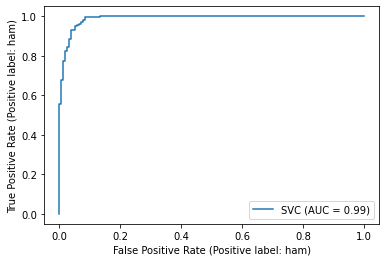

In [25]:
#  SVM roc curve
metrics.plot_roc_curve(svm_model, features_test, y_test, pos_label = "ham") 

C:\Users\rlong\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


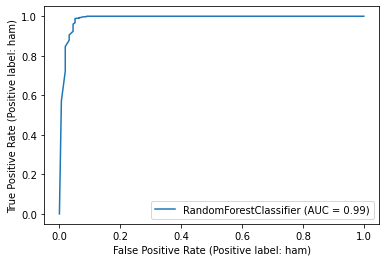

In [26]:
#  RF roc curve
metrics.plot_roc_curve(clf, features_test, y_test, pos_label="ham")

C:\Users\rlong\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


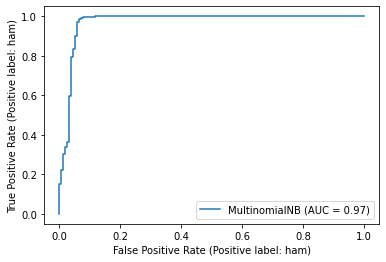

In [27]:
#  NB roc curve
metrics.plot_roc_curve(nb_model, features_test, y_test, pos_label="ham")

Text(0.5, 33.0, 'Predicted label')

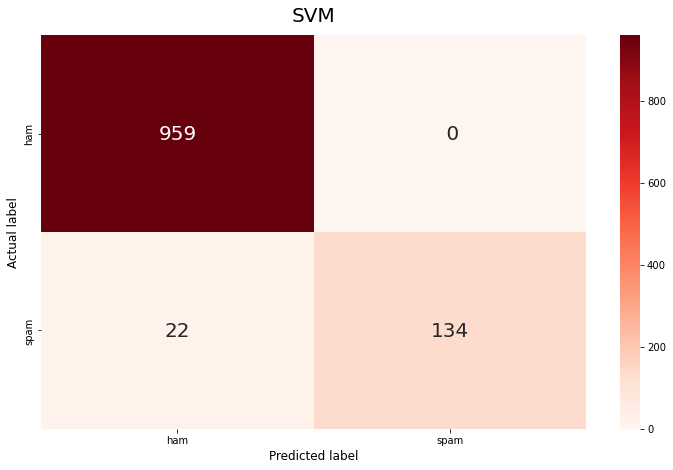

In [39]:
class_names =[0 ,1] # name of classes
fig , ax = plt. subplots (figsize=(10,6))
tick_marks = np. arange (len( class_names ))
plt. xticks ( tick_marks, class_names)
plt. yticks ( tick_marks , class_names )
# create heatmap
sns. heatmap (pd. DataFrame (svm_cm), annot = True ,cmap = "Reds" ,
              fmt="2g", xticklabels = ("ham", "spam"), yticklabels = ("ham", "spam"), 
              annot_kws={'size': 20, 'rotation': 0})
ax. xaxis . set_label_position ("bottom")
plt. tight_layout ()
plt. title ("SVM", y =1.02, fontsize=20)
plt. ylabel ("Actual label", fontsize=12)
plt. xlabel ("Predicted label", fontsize=12)

Text(0.5, 33.0, 'Predicted label')

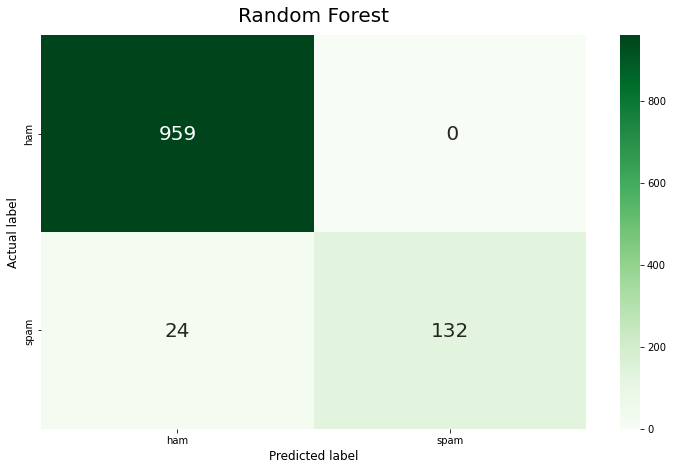

In [35]:
class_names =[0 ,1] # name of classes
fig , ax = plt. subplots (figsize=(10,6))
tick_marks = np. arange (len( class_names ))

plt. xticks ( tick_marks, class_names)
plt. yticks ( tick_marks , class_names )
# create heatmap
sns. heatmap (pd. DataFrame (rf_cm), annot = True ,cmap = "Greens" ,
              fmt="2g", xticklabels = ("ham", "spam"), yticklabels = ("ham", "spam"), 
              annot_kws={'size': 20, 'rotation': 0})
ax. xaxis . set_label_position ("bottom")
plt. tight_layout ()
plt. title ("Random Forest", y =1.02, fontsize=20)
plt. ylabel ("Actual label", fontsize=12)
plt. xlabel ("Predicted label", fontsize=12)

Text(0.5, 33.0, 'Predicted label')

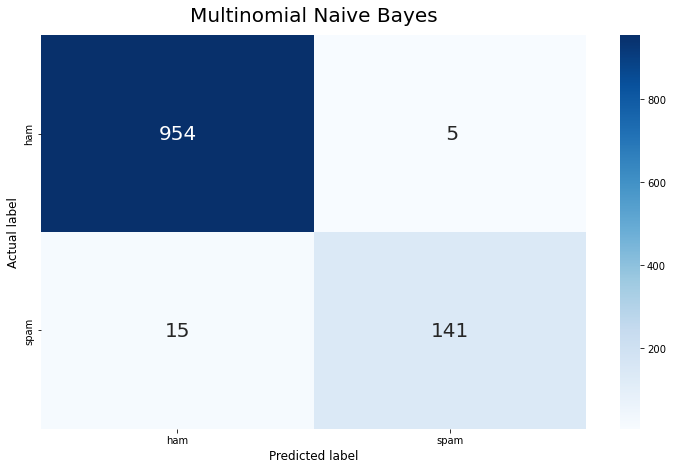

In [36]:
class_names =[0 ,1] # name of classes
fig , ax = plt. subplots (figsize=(10,6))
tick_marks = np. arange (len( class_names ))
plt. xticks ( tick_marks, class_names)
plt. yticks ( tick_marks , class_names )
# create heatmap
sns. heatmap (pd. DataFrame (nb_cm), annot = True ,cmap = "Blues" ,
              fmt="2g", xticklabels = ("ham", "spam"), yticklabels = ("ham", "spam"), 
              annot_kws={'size': 20, 'rotation': 0})
ax. xaxis . set_label_position ("bottom")
plt. tight_layout ()
plt. title ("Multinomial Naive Bayes", y =1.02, fontsize=20)
plt. ylabel ("Actual label", fontsize=12)
plt. xlabel ("Predicted label", fontsize=12)

In [42]:
#  RF average scores
scores=[]
x=0
while x < 20:
    z_train, z_test,y_train, y_test = train_test_split(z,y,test_size = 0.2)
    cv = CountVectorizer()
    features = cv.fit_transform(z_train)
    features_test = cv.transform(z_test)
    clf.fit(features,y_train)
    scores.append(float(format(clf.score(features_test,y_test))))
    x = x + 1
    

print(sum(scores)/20) 

0.9757399103139013


In [43]:
#  SVM average score
scores=[]
x=0
while x < 20:
    z_train, z_test,y_train, y_test = train_test_split(z,y,test_size = 0.2)
    cv = CountVectorizer()
    features = cv.fit_transform(z_train)
    features_test = cv.transform(z_test)
    svm_model.fit(features,y_train)
    scores.append(float(format(svm_model.score(features_test,y_test))))
    x = x + 1
    

print(sum(scores)/20)

0.9808071748878925


In [44]:
#  NB average score
scores=[]
x=0
while x < 20:
    z_train, z_test,y_train, y_test = train_test_split(z,y,test_size = 0.2)
    cv = CountVectorizer()
    features = cv.fit_transform(z_train)
    features_test = cv.transform(z_test)
    nb_model.fit(features,y_train)
    scores.append(float(format(nb_model.score(features_test,y_test))))
    x = x + 1
    

print(sum(scores)/20)

0.9873991031390135


In [45]:
#  GNB model training
features = features.toarray()
gnb_model = GaussianNB()
gnb_model.fit(features , y_train )

GaussianNB()

In [46]:
#  BNB model training

bnb_model = BernoulliNB()
bnb_model.fit(features , y_train )

BernoulliNB()

In [47]:
features_test1 = features_test.toarray()

("GaussianNB() Score " + str(gnb_model.score(features_test1, y_test)))

'GaussianNB() Score 0.9192825112107623'

In [50]:
features_test = cv.transform(z_test)

("BernoulliNB Score " + str(bnb_model.score(features_test3, y_test)))

'BernoulliNB Score 0.9829596412556054'

In [51]:
bnb_y_pred = bnb_model.predict ( features_test )

bnb_cm = confusion_matrix (y_test , bnb_y_pred )
bnb_cm

array([[972,   0],
       [ 19, 124]], dtype=int64)

In [52]:
# BNB recall
recall_score(y_test , bnb_y_pred, pos_label = "ham")

1.0

In [53]:
#  BNB precision
precision_score(y_test , bnb_y_pred, pos_label = "ham")

0.9808274470232089

In [55]:
#  GNB recall
gnb_y_pred = gnb_model.predict ( features_test1 )

recall_score(y_test , gnb_y_pred, pos_label = "ham")

0.9218106995884774

In [56]:
#  GNB precision

precision_score(y_test , gnb_y_pred, pos_label = "ham")

0.9846153846153847